In [105]:
!pip install gym_super_mario_bros==7.3.0 nes_py

  Obtaining dependency information for gym_super_mario_bros==7.3.0 from https://files.pythonhosted.org/packages/a0/b8/07460212c2568f78b02995834e7bdc25349e586473919e2983e01b984abf/gym_super_mario_bros-7.3.0-py2.py3-none-any.whl.metadata
  Using cached gym_super_mario_bros-7.3.0-py2.py3-none-any.whl.metadata (9.4 kB)
Using cached gym_super_mario_bros-7.3.0-py2.py3-none-any.whl (198 kB)
  Attempting uninstall: gym_super_mario_bros
    Found existing installation: gym-super-mario-bros 7.4.0
    Uninstalling gym-super-mario-bros-7.4.0:
      Successfully uninstalled gym-super-mario-bros-7.4.0


In [1]:
# Import the game
import gym
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v3', apply_api_compatibility=True, render_mode="human")

C:\Users\saina\anaconda3\Lib\site-packages\gym\envs\registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(


In [3]:
env.action_space

Discrete(256)

In [4]:
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [5]:
env.action_space

Discrete(7)

In [6]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [7]:
env.observation_space.shape

(240, 256, 3)

In [8]:
SIMPLE_MOVEMENT[env.action_space.sample()]

['NOOP']

In [9]:
# Create a flag - restart or not
done = True

# Loop through each frame in the game
for step in range(100000): 
    # Start the game at the beginning of an episode
    if done: 
        state = env.reset()  # Reset the environment
        done = False  # Reset the done flag
    
    # Perform a random action
    state, reward, done, info,_ = env.step(env.action_space.sample())

    # Render the environment
    env.render()

    # If the episode is done, break the loop
    if done:
        break  

# Close the environment
env.close()

C:\Users\saina\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
C:\Users\saina\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:272: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.
  logger.warn(
C:\Users\saina\anaconda3\Lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


In [10]:
class CustomJoypadSpace(JoypadSpace):
    def reset(self, **kwargs):
        """Override reset to remove unexpected 'seed' argument."""
        kwargs.pop("seed", None)  # Remove 'seed' if it exists
        return super().reset(**kwargs)

In [11]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

C:\Users\saina\anaconda3\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [24]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v3')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)

from gym.wrappers import ResizeObservation
env = ResizeObservation(env, (84, 84))

# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

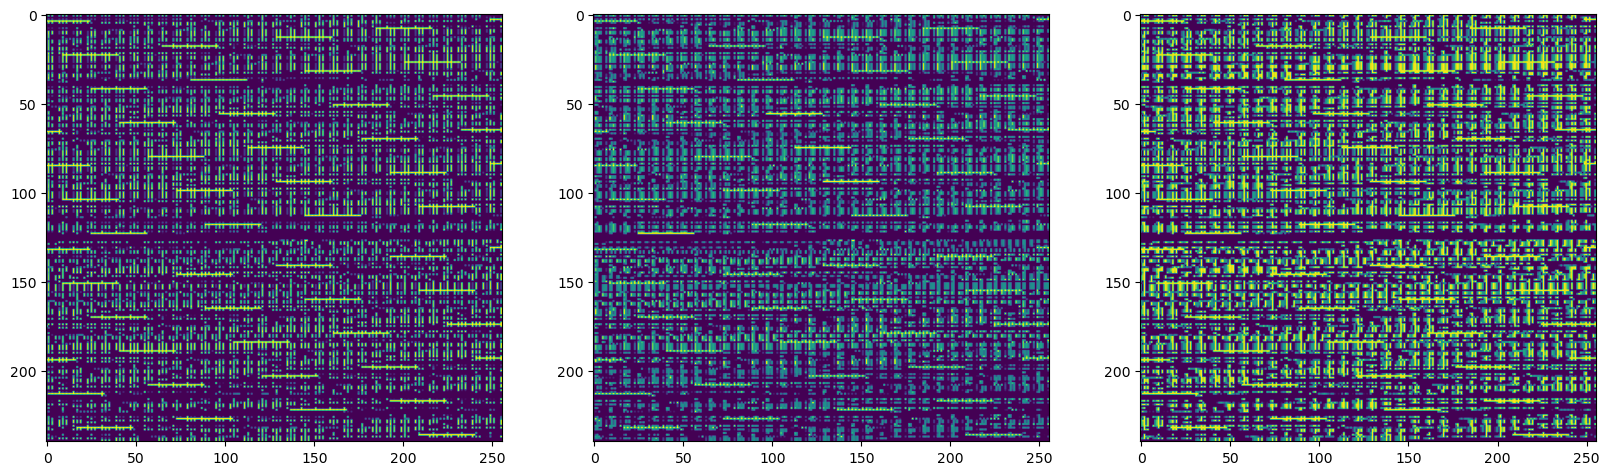

In [25]:
plt.figure(figsize=(20,16))

if len(state.shape) == 4:  # Expected shape: (batch, H, W, C)
    for idx in range(state.shape[-1]):
        plt.subplot(1, state.shape[-1], idx + 1)
        plt.imshow(state[0][:, :, idx])
elif len(state.shape) == 3:  # Shape: (H, W, C)
    for idx in range(state.shape[-1]):
        plt.subplot(1, state.shape[-1], idx + 1)
        plt.imshow(state[:, :, idx])
else:
    print("Unexpected state shape:", state.shape)
